<a href="https://colab.research.google.com/github/aaravpanchal/Ted-Talk-Views-Prediction-/blob/main/Ted_Talk_Views_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  Ted Talk Views Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Made by -**Aarav Panchal 


# **Project Summary -**

TED is devoted to spreading powerful ideas on just about any topic. These datasets contain over 4,000 TED talks including transcripts in many languages Founded in 1984 by Richard Salman as a nonprofit organization that aimed at bringing experts from the fields of Technology, Entertainment, and Design together. TED Conferences have gone on to become the Mecca of ideas from virtually all walks of life. As of 2015, TED and its sister TEDx chapters have published more than 2000 talks for free consumption by the masses and its speaker list boasts of the likes of Al Gore, Jimmy Wales, Shahrukh Khan, and Bill Gates.

In this project, we will try to understand the data by performing EDA on useful KPIs and create some insights. We will also try to understand that what are the factors that are associated for generating more views.

Our Project Workflow:

*  Importing Libraries

*  Loading the dataset

*  Data Cleaning

*  EDA on features

*  Feature selection

*  Fitting the regression models

*  HyperParameter Tuning

*  Evaluation Metrices of the model

*  Final selection of the model

*  Conclusion

Libraries we will use to perform these:

*  Data wrangling : Numpy and Pandas

*  Data Visualization : Matplotlib and Seaborn

*  Machine learning : Scikit Learn and XGBoost

# **GitHub Link -**

https://github.com/aaravpanchal/Ted-Talk-Views-Prediction-

# **Problem Statement**


We have given various features and one target feature 'views'. We need create a predictive model for predicting 'views' and validate that model. We also have to perfom EDA around 'views' and other features as well followed by Data Wrangling and Data Cleaning.

#### **Define Your Business Objective?**

Creating a prediction model for views can help TED to know that how the video is going to perform before even it will be recorded. This will help them to know the feature importances that consitutes more in generating views on  a Talk. Hence, It will create a path for TED for better investement to generate more audience and busniess reveneue with higher profits.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import math
import ast
import time
import datetime
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error,mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')
dataset = pd.read_csv('/content/drive/MyDrive/data_ted_talks.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset First View

In [ ]:
# Dataset First Look
dataset.head()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print("Total raws are",dataset.shape[0])
print("Total Columns are" ,len(dataset.columns))

Total raws are 4005
Total Columns are 19


### Dataset Information

In [ ]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
dataset.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
dataset.isnull().sum()

talk_id             0
title               0
speaker_1           0
all_speakers        4
occupations       522
about_speakers    503
views               0
recorded_date       1
published_date      0
event               0
native_lang         0
available_lang      0
comments          655
duration            0
topics              0
related_talks       0
url                 0
description         0
transcript          0
dtype: int64

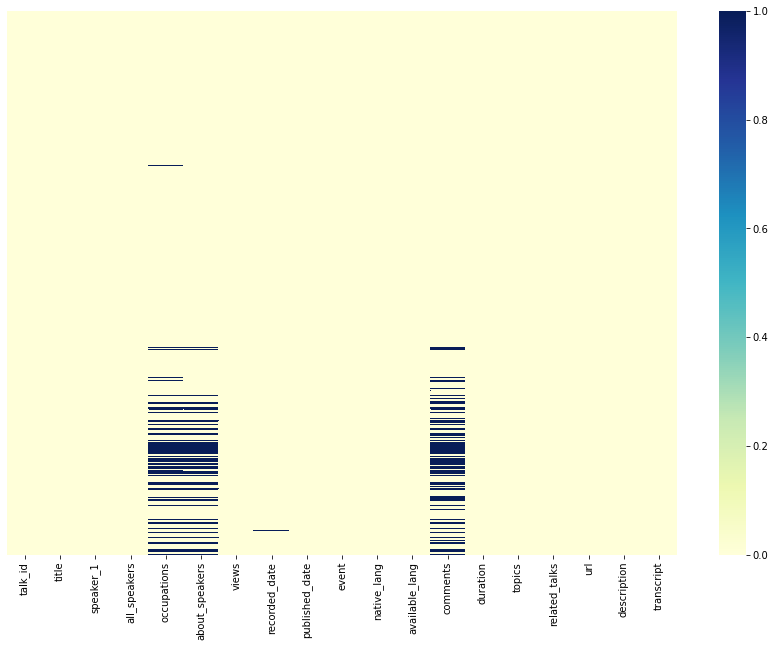

In [ ]:
#visualizing missing values
plt.rcParams['figure.figsize'] = (15, 10)
sns.heatmap(dataset.isnull(), yticklabels=False, cbar=True, cmap='YlGnBu')

### What did you know about your dataset?

Our data is has missing values in features like occupations, about_speakers and comments. We total 19 features and most of them are object type.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
dataset.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript'],
      dtype='object')

In [ ]:
# Dataset Describe
dataset.describe(include="all")

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
count,4005.000000,4005,4005,4001,3483,3502,4.005000e+03,4004,4005,4005,4005,4005,3350.000000,4005.000000,4005,4005,4005,4005,4005
unique,NaN,4005,3274,3306,2049,2977,NaN,1334,2962,459,12,3902,NaN,NaN,3977,4005,4005,4005,4005
top,NaN,Averting the climate crisis,Alex Gendler,{0: 'Alex Gendler'},{0: ['writer']},{0: 'Alex Rosenthal takes everyday experiences...,NaN,2017-04-24,2017-09-07,TED-Ed,en,['en'],NaN,NaN,"['TED-Ed', 'math']","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
freq,NaN,1,34,34,53,10,NaN,97,27,556,3957,24,NaN,NaN,8,1,1,1,1
mean,12432.538327,NaN,NaN,NaN,NaN,NaN,2.148006e+06,NaN,NaN,NaN,NaN,NaN,161.997015,724.011236,NaN,NaN,NaN,NaN,NaN
std,17447.576262,NaN,NaN,NaN,NaN,NaN,3.451226e+06,NaN,NaN,NaN,NaN,NaN,268.838922,361.775462,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,0.000000,60.000000,NaN,NaN,NaN,NaN,NaN
25%,1252.000000,NaN,NaN,NaN,NaN,NaN,8.820690e+05,NaN,NaN,NaN,NaN,NaN,38.000000,393.000000,NaN,NaN,NaN,NaN,NaN
50%,2333.000000,NaN,NaN,NaN,NaN,NaN,1.375508e+06,NaN,NaN,NaN,NaN,NaN,89.000000,738.000000,NaN,NaN,NaN,NaN,NaN
75%,23777.000000,NaN,NaN,NaN,NaN,NaN,2.133110e+06,NaN,NaN,NaN,NaN,NaN,188.000000,974.000000,NaN,NaN,NaN,NaN,NaN


### Variables Description 

The dataset contains features like:

*  talk_id: Talk identification number provided by TED
*  title: Title of the talk
*  speaker_1: First speaker in TED's speaker list
*  all_speakers: Speakers in the talk
*  occupations: Occupations of the speakers
*  about_speakers: Blurb about each speaker
*  recorded_date: Date the talk was recorded
*  published_date: Date the talk was published to TED.com
*  event: Event or medium in which the talk was given
*  native_lang: Language the talk was given in
*  available_lang: All available languages (lang_code) for a talk
*  comments: Count of comments
*  duration: Duration in minutes
*  topics: Related tags or topics for the talk
*  related_talks: Related talks (key='talk_id',value='title')
*  url: URL of the talk
*  description: Description of the talk
*  transcript: Full transcript of the talk

Target Variable :

*  views: Contains Count of views of every talk

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in dataset.columns:
  print("Unique values of",i,"is",dataset[i].nunique())
  

Unique values of talk_id is 4005
Unique values of title is 4005
Unique values of speaker_1 is 3274
Unique values of all_speakers is 3306
Unique values of occupations is 2049
Unique values of about_speakers is 2977
Unique values of views is 3996
Unique values of recorded_date is 1334
Unique values of published_date is 2962
Unique values of event is 459
Unique values of native_lang is 12
Unique values of available_lang is 3902
Unique values of comments is 601
Unique values of duration is 1188
Unique values of topics is 3977
Unique values of related_talks is 4005
Unique values of url is 4005
Unique values of description is 4005
Unique values of transcript is 4005


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
#changing the format
import datetime
dataset['published_date'] = dataset['published_date'].apply(lambda x: datetime.datetime.strptime(x,"%Y-%m-%d"))

In [ ]:
# Extracting release day, month and year from the published date column

dataset['release_day'] = dataset['published_date'].apply(lambda x: x.weekday())
dataset['release_month']=dataset['published_date'].apply(lambda x: x.month)
dataset['release_year'] = dataset['published_date'].apply(lambda x: x.year)
     

In [ ]:
# Encoding of release_day column with corresponding week day name

week_day={0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
dataset['release_day']=dataset['release_day'].map(week_day)

In [ ]:
# Encoding of release_month column with corresponding month name
month_dict={1:'Jan',2:'Feb',3:'March',4:'April',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
dataset['release_month']=dataset['release_month'].map(month_dict)

### What all manipulations have you done and insights you found?

I have changed the format to datetime of published date and created three different features extracting week, month and year. Then I have mapped them in their corresponding day and month.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### **Views Distribution**

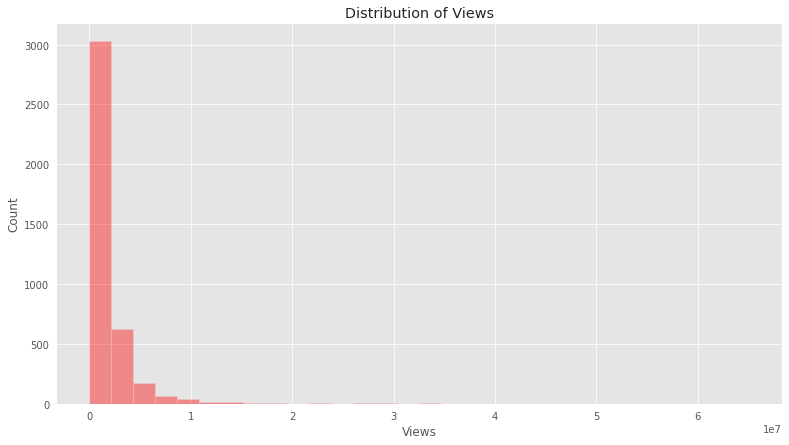

In [ ]:
#Ploting Distplot
plt.style.use('ggplot')
plt.figure(figsize=(13,7))
sns.distplot(dataset['views'], kde = False, color ='red', bins = 30)
plt.title("Distribution of Views")
plt.ylabel("Count")
plt.xlabel("Views")
plt.show()

##### 1. Why did you pick the specific chart?

We need to know the nautre of about our target variable. I have used distribution plot here. 

##### 2. What is/are the insight(s) found from the chart?

The feature is highly right skewed. That means there is outliers influnce on the feature. Most of the talks have 1 million views. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Getting know how most of the talks are getting views can help business to evaluate the growth of the business.

#### **Top 10 Most Popular TED Speakers**

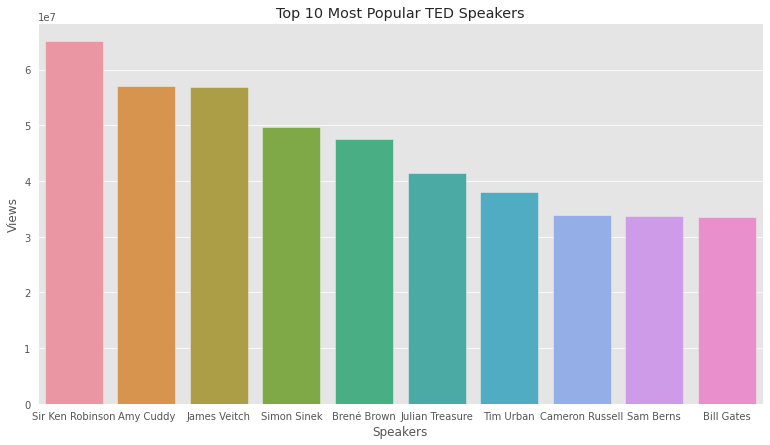

In [ ]:
# Speaker of top 10 most watched video
pop_df=dataset.nlargest(10, ['views'])
pop_df[['speaker_1','views','title']]
# Bar plot to show speaker of top 10 popular videos.
plt.figure(figsize=(13,7))
sns.barplot(x='speaker_1',y='views',data=pop_df)
plt.title("Top 10 Most Popular TED Speakers")
plt.ylabel("Views")
plt.xlabel("Speakers")
plt.show()

##### 1. Why did you pick the specific chart?

When watching a TED Talk what comes in our mind is the speaker. So I have used the barplot.

##### 2. What is/are the insight(s) found from the chart?

Sir Ken Robinson have the maximum views on the Talk with around 65 million views. Its a huge numbers and Bill gates have least views in the top 10 with 35 million views. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Speakers influences the popularity I would say. More popular the speaker more the views. Who doesnt know Ken Robinson and Bill gates.

#### Top 5 Most Viewed Speakers

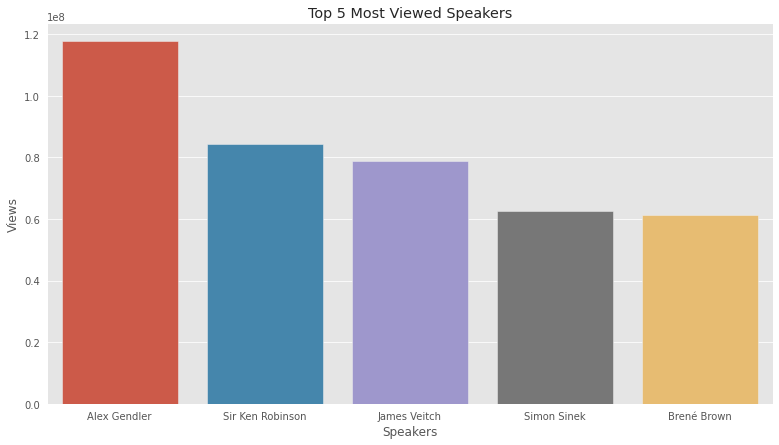

In [ ]:
# Extracting top 5 popular speaker from the dataset
pop_speaker_df=dataset.groupby('speaker_1').agg({'views' : 'sum'}).nlargest(5,['views'])
pop_speaker_df.reset_index(inplace=True)
# Barplot to show top 5 popular speaker.
plt.figure(figsize=(13,7))
sns.barplot(x='speaker_1',y='views',data=pop_speaker_df)
plt.title("Top 5 Most Viewed Speakers")
plt.ylabel("Views")
plt.xlabel("Speakers")
plt.show()     

##### 1. Why did you pick the specific chart?

This chart shows top speakers with Speakers with maximum views by all time on being on Ted. 

##### 2. What is/are the insight(s) found from the chart?

Surprisingly, Alex Gendler has more than 100 million views while he did not make it most popular Ted. Brene Brown is last in the list with around 60 million views.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, This will help stakeholders to know that which speaker is loved to watch again by the audience. 

#### Top 5 Most Frequent Ted Events

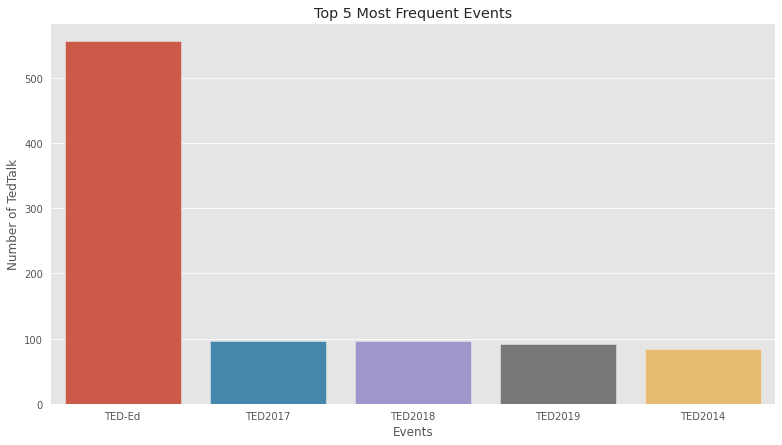

In [ ]:
# Let's find the most frequent event categories
freq_event_df=dataset[['event','views']].groupby('event').agg({'views' : 'count'}).nlargest(5,['views'])
freq_event_df.reset_index(inplace=True)
# Barplot to show the most frequent event category
plt.figure(figsize=(13,7))
sns.barplot(x='event',y='views',data=freq_event_df)
plt.title("Top 5 Most Frequent Events")
plt.ylabel("Number of TedTalk")
plt.xlabel("Events")
plt.show()     

##### 1. Why did you pick the specific chart?

This chart hepls us to know which event held the most number of Ted Talks.

##### 2. What is/are the insight(s) found from the chart?

Ted Ed is event that holds the maxiumum number of TedTalks with more than 500 talks where the other four are keeping similar numbers which is around 100.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Ted Ed is the event that holds the maximum TedTalks. That means most of the speakers are doing Education related Talks.

#### Top 5 Events by Average Views

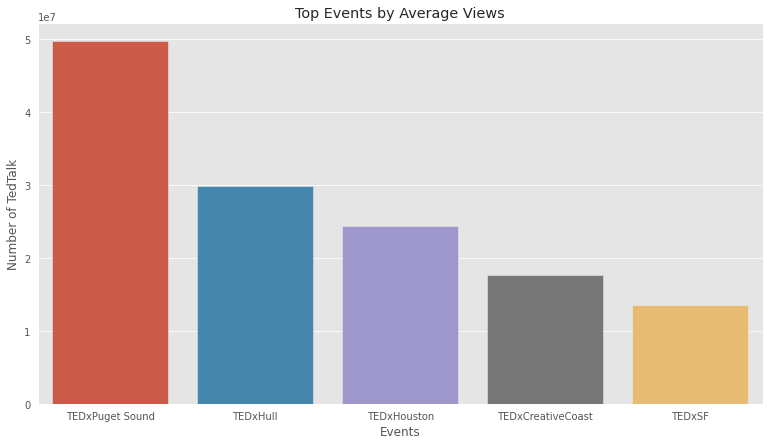

In [ ]:
# Top 5 popular event categories
pop_event_df=dataset[['event','views']].groupby('event').agg({'views' : 'mean'}).nlargest(5,['views'])
pop_event_df.reset_index(inplace=True)   
# Barplot to show top event category according to average views
plt.figure(figsize=(13,7))
plt.title('Top Events by Average Views')
sns.barplot(x='event',y='views',data=pop_event_df)
plt.ylabel("Average Views")
plt.xlabel("Events")
plt.show()     

##### 1. Why did you pick the specific chart?

Its not just about getting to know about number of tedtalks. here, we need to check average views of each Ted Event.

##### 2. What is/are the insight(s) found from the chart?

TEDx Puget Sound gains the maximum views on average in the list with around 50 million views each time it happens, Its a huge number too. TedXSF comes a 5th position with more than 10 million views.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, stakeholders can try to make these events more as average views gained by them is higher, It help to gain overall revenue of the Company.

it was just about speakers and events, now lets check via time frame.

#### TedTalks vs Years


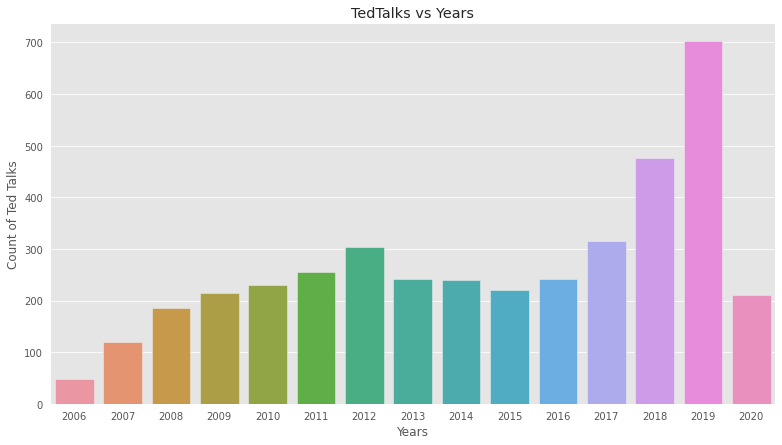

In [ ]:
#views vs years
top_published_years=dataset.groupby("release_year")["views"].count().sort_values(ascending=False).reset_index()
plt.style.use('ggplot')
plt.figure(figsize=(13,7))
sns.barplot(x="release_year",y="views" ,data=top_published_years)
plt.title('TedTalks vs Years')
plt.ylabel("Count of Ted Talks")
plt.xlabel("Years")
plt.show()   

##### 1. Why did you pick the specific chart?

This chart shows us number of TedTalk happend in recent years. it shows the which year have been full of TedTalks.

##### 2. What is/are the insight(s) found from the chart?

Here we can see, 2019 was the year when Ted held the most of the Talks. It shows linear progress in recent year and then sudden downfall in 2020 reason being we had covid.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, This can help to make stakeholders understand the progress of the company.

#### Views vs Years

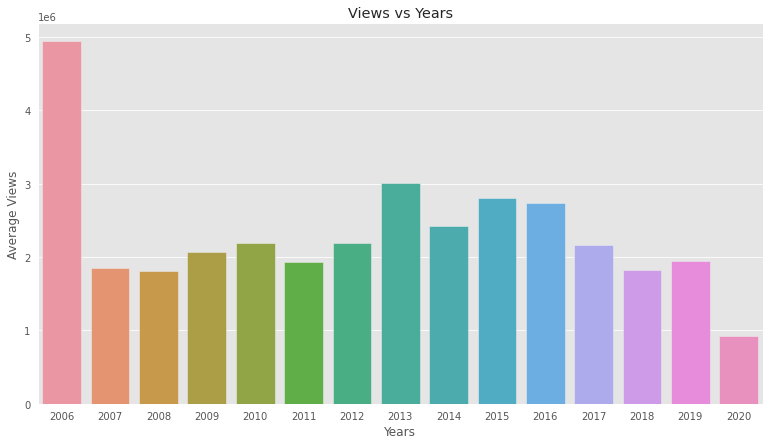

In [ ]:
# Extracting the most popular release years w.r.t. average Views
pop_rel_year=dataset[['release_year','views']].groupby('release_year').agg({'views' : 'mean'})
pop_rel_year=pop_rel_year.sort_values('views',ascending=False)
pop_rel_year.reset_index(inplace=True)
#Barplot to show year which have maximum average views.
plt.figure(figsize=(13,7))
sns.barplot(x='release_year',y='views',data=pop_rel_year)
plt.title('Views vs Years')
plt.ylabel("Average Views")
plt.xlabel("Years")
plt.show() 

##### 1. Why did you pick the specific chart?

This chart shows us average views in each year.

##### 2. What is/are the insight(s) found from the chart?

Surprisingly, 2006 has the maximum number of average views followed by 2013. Even though 2006 has the minimum number shows held. That mean 2006 had few but gained lot of success.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

We can check the factors that what caused large number of viwes that happend in 2006 and implement now to gain that much views.

#### TedTalk vs Day

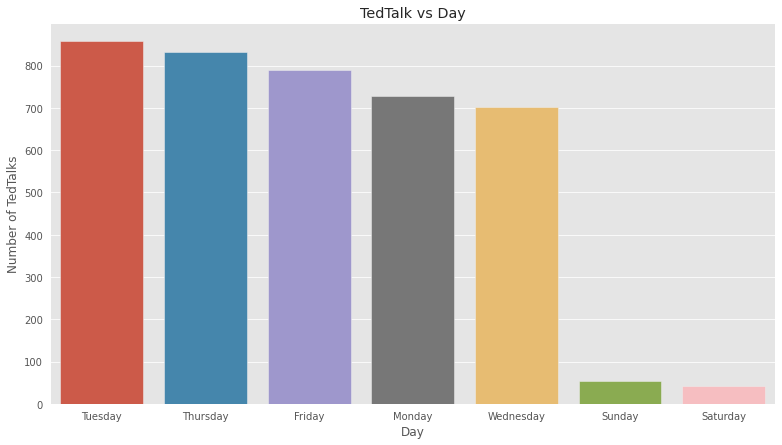

In [ ]:
freq_rel_day=dataset[['release_day','views']].groupby('release_day').agg({'views' : 'count'})
freq_rel_day=freq_rel_day.sort_values('views',ascending=False)
freq_rel_day.reset_index(inplace=True)
# Barplot to show the day of the week having maximum release date 
plt.figure(figsize=(13,7))
sns.barplot(x='release_day',y='views',data=freq_rel_day)
plt.title('TedTalk vs Day')
plt.ylabel("Number of TedTalks")
plt.xlabel("Day")
plt.show() 

##### 1. Why did you pick the specific chart?

This chart shows us the day when maximum number of times shows are uplaoded on the platfrom.

##### 2. What is/are the insight(s) found from the chart?

Tuesday is day when maximum shows are released followed by thrusday, Fiday and Monday. On weekend its minimum which totally understandable.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

There is no clue why on tuesday the shows are getting uplaoded the most. Lets find out with average views. That would paint a better picture fo us.

#### Views vs Day

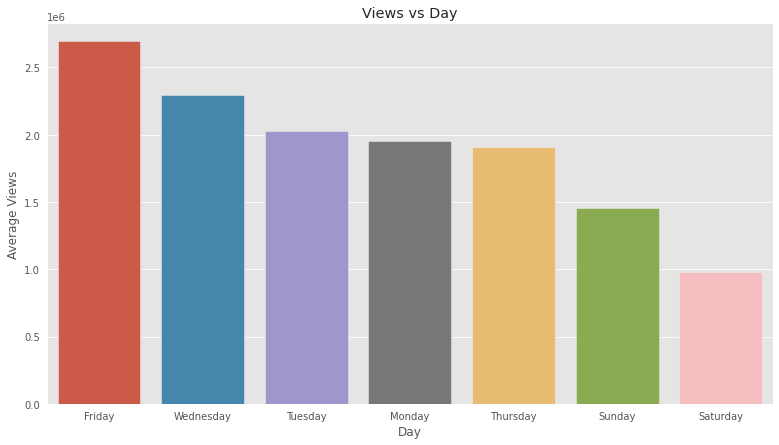

In [ ]:
# Extracting the best release day of the week w.r.t. average views
pop_rel_day=dataset[['release_day','views']].groupby('release_day').agg({'views' : 'mean'})
pop_rel_day=pop_rel_day.sort_values('views',ascending=False)
pop_rel_day.reset_index(inplace=True)     
# Barplot to show released week days having maximum views.
plt.figure(figsize=(13,7))
sns.barplot(x='release_day',y='views',data=pop_rel_day)
plt.title('Views vs Day')
plt.ylabel("Average Views")
plt.xlabel("Day")
plt.show() 

##### 1. Why did you pick the specific chart?

It shows us the day when views are gained the most. That can help to know when people love to watch the most.

##### 2. What is/are the insight(s) found from the chart?

Friday is the day when views are the most. That means people usualy watching shows at night as weekend arrives.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Here, The Average views are gained the most when shows releases on friday, that means new shows can be released more on friday rather than Tuesday. That would help generating more views.

#### TedTalk vs Month

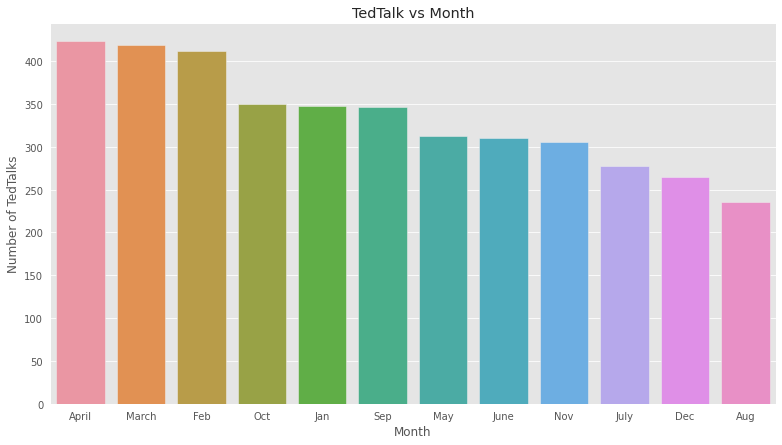

In [ ]:
# Checking months having maximum release 
freq_rel_month=dataset[['release_month','views']].groupby('release_month').agg({'views' : 'count'})
freq_rel_month=freq_rel_month.sort_values('views',ascending=False)
freq_rel_month.reset_index(inplace=True)
# Barplot showing month having most frequent release. 
plt.figure(figsize=(13,7))
sns.barplot(x='release_month',y='views',data=freq_rel_month)
plt.title('TedTalk vs Month')
plt.ylabel("Number of TedTalks")
plt.xlabel("Month")
plt.show()  

##### 1. Why did you pick the specific chart?

This chart shows us the months when most of the shows are released.

##### 2. What is/are the insight(s) found from the chart?

Feb, March and April are the month when most of the shows are released. The could be due to end of financial year. least number of shows are added in August

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

There is no trend in the data except than end of financial year.

#### Views vs Month

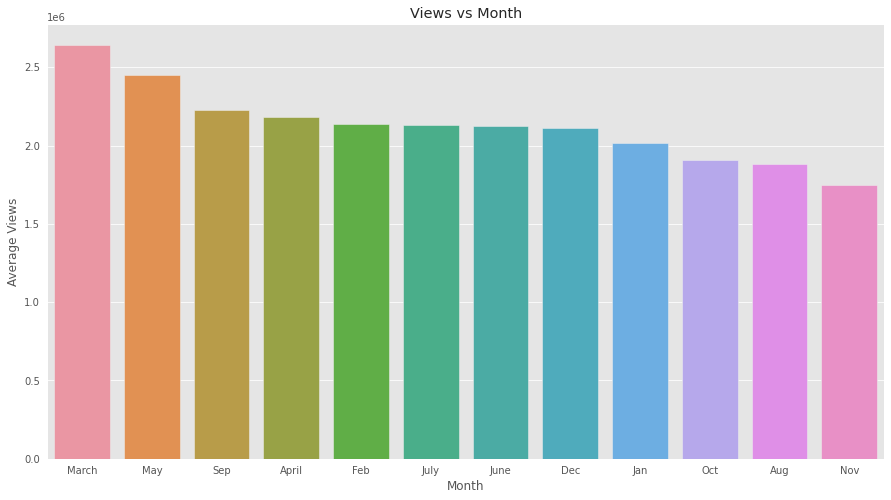

In [ ]:
# Checking the most popular release month according to average Views
pop_rel_month=dataset[['release_month','views']].groupby('release_month').agg({'views' : 'mean'})
pop_rel_month=pop_rel_month.sort_values('views',ascending=False)
pop_rel_month.reset_index(inplace=True)
# Barplot showing months having maximum average views.
plt.figure(figsize=(15,8))
sns.barplot(x='release_month',y='views',data=pop_rel_month)
plt.title('Views vs Month')
plt.ylabel("Average Views")
plt.xlabel("Month")
plt.show()  


##### 1. Why did you pick the specific chart?

This shows us the month when most shows are viewed the most.

##### 2. What is/are the insight(s) found from the chart?

March is the month when views are higher followd by May and September.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

By seeing previous two charts, It is clearly visible that when more shows are released more views are gained in a month.

####Correlation Heatmap

Text(0.5, 1.0, 'Heatmap')

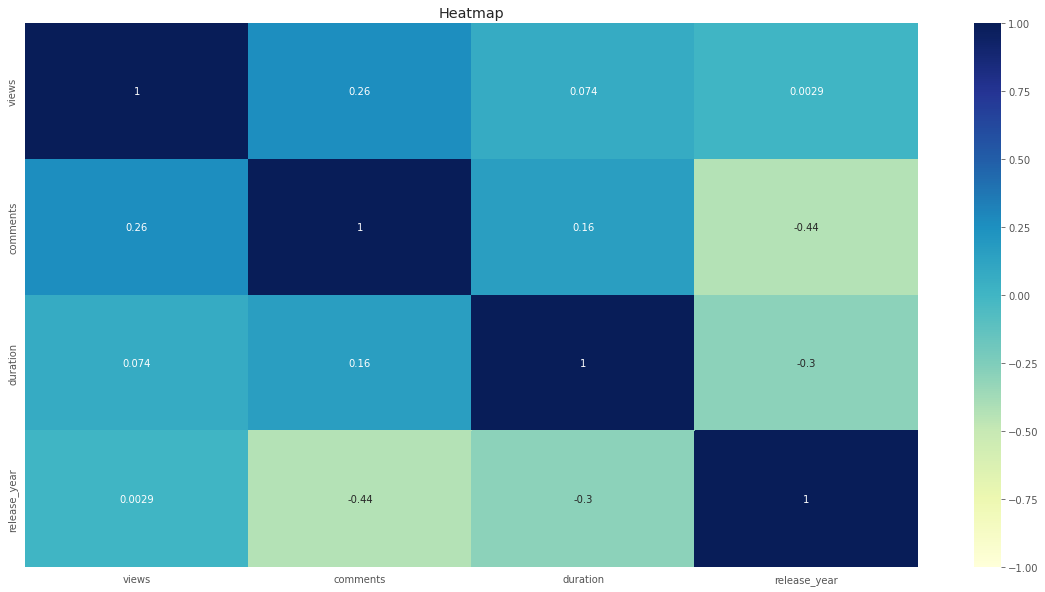

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(20,10))
sns.heatmap(dataset.drop('talk_id',axis=1).corr(method='kendall'), cmap="YlGnBu", annot=True,vmin=-1,vmax=1)
plt.title('Heatmap')

##### 1. Why did you pick the specific chart?

It shows correlation between each numerical factors, here we can check multicollnearity here.

##### 2. What is/are the insight(s) found from the chart?

There is no strong correlation except comments and release year. It shows in recent years shows are getting less comments. There is slight negative relation between duration and release year as well. that indicates duration of shows has been decreased with time.

#### Chart - 15 - Pair Plot 

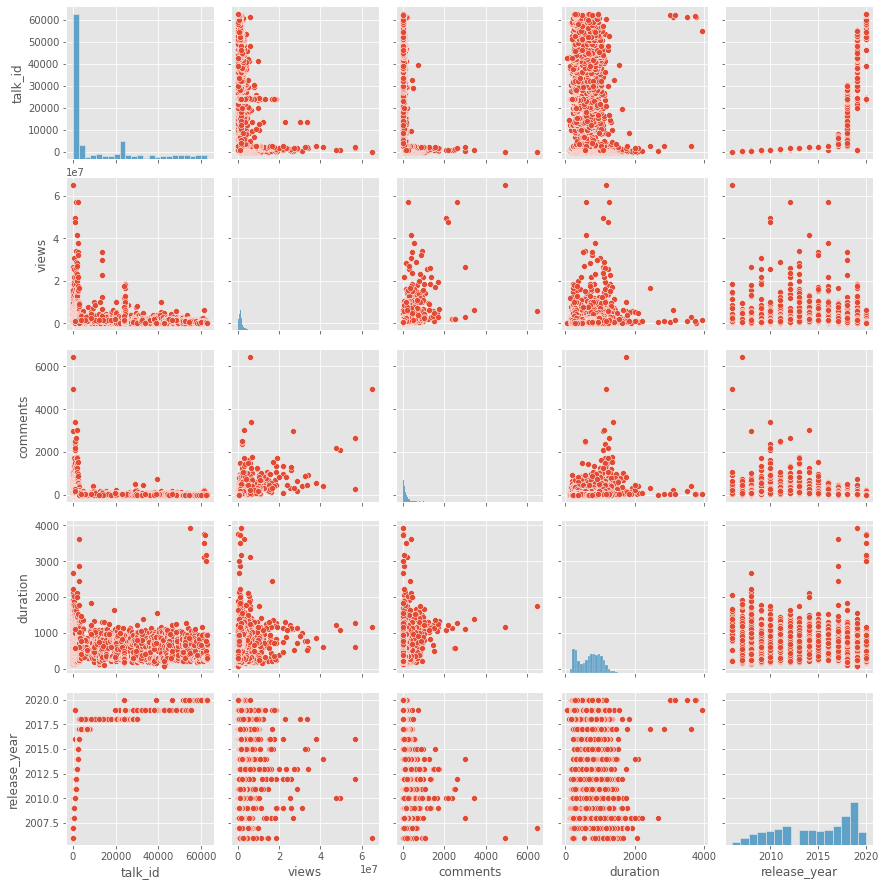

In [ ]:
# Pair Plot visualization code
sns.pairplot(dataset)

##### 1. Why did you pick the specific chart?

Here we can check the relation between each variable with our target variable.

##### 2. What is/are the insight(s) found from the chart?

There is no linear relationship of any feature with our target variable views.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
dataset.isnull().sum()

talk_id             0
title               0
speaker_1           0
all_speakers        4
occupations       522
about_speakers    503
views               0
recorded_date       1
published_date      0
event               0
native_lang         0
available_lang      0
comments          655
duration            0
topics              0
related_talks       0
url                 0
description         0
transcript          0
release_day         0
release_month       0
release_year        0
dtype: int64

In [ ]:
dataset.describe(include='all')

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,...,comments,duration,topics,related_talks,url,description,transcript,release_day,release_month,release_year
count,4005.000000,4005,4005,4001,3483,3502,4.005000e+03,4004,4005,4005,...,3350.000000,4005.000000,4005,4005,4005,4005,4005,4005,4005,4005.000000
unique,NaN,4005,3274,3306,2049,2977,NaN,1334,2962,459,...,NaN,NaN,3977,4005,4005,4005,4005,7,12,NaN
top,NaN,Averting the climate crisis,Alex Gendler,{0: 'Alex Gendler'},{0: ['writer']},{0: 'Alex Rosenthal takes everyday experiences...,NaN,2017-04-24,2017-09-07 00:00:00,TED-Ed,...,NaN,NaN,"['TED-Ed', 'math']","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",Tuesday,April,NaN
freq,NaN,1,34,34,53,10,NaN,97,27,556,...,NaN,NaN,8,1,1,1,1,857,423,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006-06-27 00:00:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-04-30 00:00:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,12432.538327,NaN,NaN,NaN,NaN,NaN,2.148006e+06,NaN,NaN,NaN,...,161.997015,724.011236,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.596754
std,17447.576262,NaN,NaN,NaN,NaN,NaN,3.451226e+06,NaN,NaN,NaN,...,268.838922,361.775462,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.991930
min,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,...,0.000000,60.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006.000000
25%,1252.000000,NaN,NaN,NaN,NaN,NaN,8.820690e+05,NaN,NaN,NaN,...,38.000000,393.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011.000000


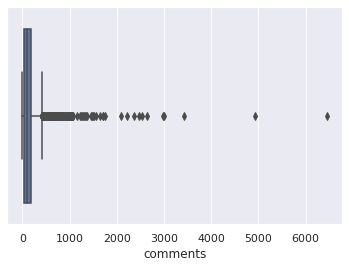

In [ ]:
sns.boxplot(dataset["comments"])

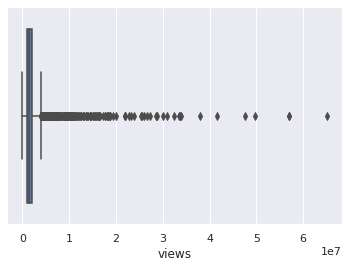

In [ ]:
sns.boxplot(dataset["views"])

In [ ]:
dataset["comments"].fillna(dataset.comments.median(),inplace=True)
dataset["views"].replace(0,dataset.views.median(),inplace=True)

#### What all missing value imputation techniques have you used and why did you use those techniques?

The dataset had missing values on comments, I have replaced it with median as this feature has outlier influnce.
I also have replace 0 values with median in views, a show cannot have zero views.

### 3. Feature Manipulation and Selection

In [ ]:
# Target encoding on speaker_1 column.
pop_speaker=dataset.groupby('speaker_1').agg({'views' : 'mean'}).sort_values(['views'],ascending=False)
pop_speaker=pop_speaker.to_dict()
pop_speaker=pop_speaker.values()
pop_speaker=  list(pop_speaker)[0]
dataset['speaker_1_avg_views']=dataset['speaker_1'].map(pop_speaker)

In [ ]:
# Target encoding on event column
pop_event=dataset.groupby('event').agg({'views' : 'mean'}).sort_values(['views'],ascending=False)
pop_event=pop_event.to_dict()
pop_event=pop_event.values()
pop_event=  list(pop_event)[0]
dataset['event_wise_avg_views']=dataset['event'].map(pop_event)

In [ ]:
# Adding new feature num_of_lang
dataset['num_of_lang'] = dataset.apply(lambda x: len(x['available_lang']), axis=1)

In [ ]:
# Adding new feature video_age
dataset['video_age']=2022-dataset['release_year']

In [ ]:
# Dropping unimportant columns from the dataframe.
dataset.drop(columns=['talk_id','title','speaker_1', 'all_speakers','published_date','event','available_lang','occupations',
       'about_speakers', 'recorded_date','topics','related_talks','transcript','description','release_year','url','native_lang'],inplace=True)

#### What all categorical encoding techniques have you used & why did you use those techniques?

I have created new features having the average views of primary speaker, average views of event wise, number of languages available and video age by subtracting current year by released year.
Then I have dropped unnecessary features.


### 4. Categorical Encoding

In [ ]:
dataset=pd.get_dummies(dataset)

In [ ]:
dataset.head()

,views,comments,duration,speaker_1_avg_views,event_wise_avg_views,num_of_lang,video_age,release_day_Friday,release_day_Monday,release_day_Saturday,...,release_month_Dec,release_month_Feb,release_month_Jan,release_month_July,release_month_June,release_month_March,release_month_May,release_month_Nov,release_month_Oct,release_month_Sep
0,3523392,272.0,977,2.190599e+06,3.876291e+06,270,16,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,14501685,628.0,1190,3.987156e+06,3.876291e+06,303,16,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1920832,124.0,1286,2.156190e+06,3.876291e+06,165,16,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,2664069,219.0,1116,1.979411e+06,3.876291e+06,219,16,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,65051954,4931.0,1164,2.812684e+07,3.876291e+06,387,16,0,0,0,...,0,0,0,0,1,0,0,0,0,0


##### What all feature selection methods have you used  and why?

I have encoded features with pandas.get_dummies method.

##### Which all features you found important and why?

I have considered views, comments, duration, speaker_1_avg_views, event_wise_avg_views, num_of_lang, video_age and release days for our modelling.

### 8. Data Splitting

In [ ]:
#independent varaibles
x=dataset.drop(['views'],axis=1)
from scipy.stats import zscore
x = x.apply(zscore)

In [ ]:
#depeendent variable
y=np.log10(dataset["views"])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split( x,y , test_size = 0.2, random_state = 0) 
print(x_train.shape)
print(x_test.shape)

(3204, 25)
(801, 25)


##### What data splitting ratio have you used and why? 

I am keeping 20 percent data for validation as 80 percent is good data to train.

## ***7. ML Model Implementation***

We are not using Linear Regression for modelling as our data does not fulfill the assumptions to perfom the modelling.

### Random Forest

In [ ]:
rf = RandomForestRegressor(n_estimators=500,random_state=0)
rf.fit(x_train,y_train)

RandomForestRegressor(n_estimators=500, random_state=0)

In [ ]:
rf.score(x_train,y_train)

0.9796384809857316

In [ ]:
y_pred = rf.predict(x_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
MSE=round(mean_squared_error(10**(y_test), 10**(y_pred)), 4)
RMSE=round(math.sqrt(mean_squared_error(10**(y_test), 10**(y_pred))),4)
MAE=round(mean_absolute_error(10**(y_test), 10**(y_pred)),4)
MAPE=round(mean_absolute_percentage_error(10**(y_test), 10**(y_pred)),4)
R2=round(r2_score(10**(y_test), 10**(y_pred)), 4)
model= pd.DataFrame([['Random Forest Regressor', MSE,RMSE,MAE, MAPE,R2]],
               columns = ['Model', 'MSE', 'RMSE', 'MAE', 'MAPE','R2'])
model

,Model,MSE,RMSE,MAE,MAPE,R2
0,Random Forest Regressor,5.520198e+12,2.349510e+06,562533.9852,0.2676,0.7286


Text(0, 0.5, 'Predicted Value')

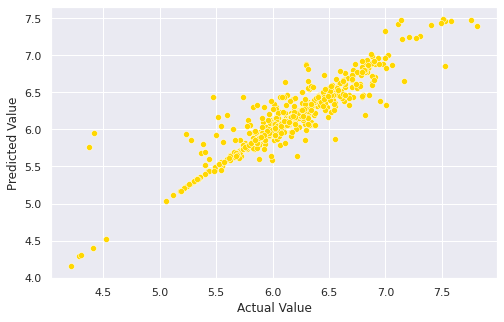

In [ ]:
plt.figure(figsize=(8,5))
sns.set_theme(style='darkgrid')
sns.scatterplot((y_test),(y_pred),color='gold')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
param_grid_rf = {'n_estimators': [200,300, 400, 500, 600], # have to wait for some time
              'criterion': ['mse', 'mae']}
random_search_rf = RandomizedSearchCV(estimator=rf,param_distributions=param_grid_rf,cv=5,n_jobs=-1)
ramdom_searchseaech_rf = random_search_rf.fit(x_train,y_train)
print('Our model score is',random_search_rf.score(x_train,y_train))
best_parameters_2 = random_search_rf.best_params_
print('best parameters are',best_parameters_2)
y_pred_rf = random_search_rf.predict(x_test)

Our model score is 0.9796384809857316
best parameters are {'n_estimators': 500, 'criterion': 'mse'}


In [ ]:
MSE=round(mean_squared_error(10**(y_test), 10**(y_pred_rf)), 4)
RMSE=round(math.sqrt(mean_squared_error(10**(y_test), 10**(y_pred_rf))),4)
MAE=round(mean_absolute_error(10**(y_test), 10**(y_pred_rf)),4)
MAPE=round(mean_absolute_percentage_error(10**(y_test), 10**(y_pred_rf)),4)
R2=round(r2_score(y_test, y_pred_rf), 4)
model2= pd.DataFrame([['Random Forest Tuned', MSE,RMSE,MAE, MAPE,R2]],
               columns = ['Model', 'MSE', 'RMSE', 'MAE', 'MAPE','R2'])
model=model.append(model2, ignore_index = True)
model

,Model,MSE,RMSE,MAE,MAPE,R2
0,Random Forest Regressor,5.520198e+12,2.349510e+06,562533.9852,0.2676,0.7286
1,Random Forest Tuned,5.520198e+12,2.349510e+06,562533.9852,0.2676,0.8528


Text(0, 0.5, 'Predicted Value')

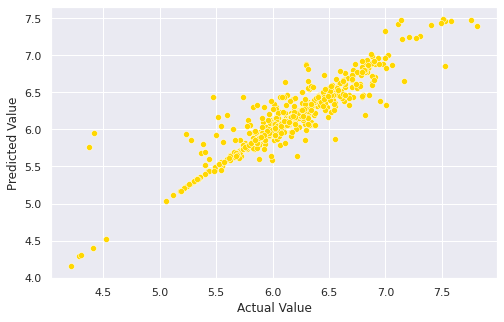

In [ ]:
plt.figure(figsize=(8,5))
sns.set_theme(style='darkgrid')
sns.scatterplot((y_test),(y_pred_rf),color='gold')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')

##### Which hyperparameter optimization technique have you used and why?

I have used RandomizedSearchCV as its computational cost friendly.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Best parameters are found be ones that we used in our base model. therefore same results.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

MSE, RMSE, MAE and MAPE are nothing but different version of Error between Predicted and Actual Values. We Generally consider MSE.
Where R2 score is related with variance between actual and predicted values.

### XGBOOST

In [ ]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(x_train,y_train)

[12:31:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
xgb.score(x_train,y_train)

0.9077225684943953

In [ ]:
y_pred_XG = xgb.predict(x_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
MSE=round(mean_squared_error(10**(y_test), 10**(y_pred_XG)), 4)
RMSE=round(math.sqrt(mean_squared_error(10**(y_test), 10**(y_pred_XG))),4)
MAE=round(mean_absolute_error(10**(y_test), 10**(y_pred_XG)),4)
MAPE=round(mean_absolute_percentage_error(10**(y_test), 10**(y_pred_XG)),4)
R2=round(r2_score(10**(y_test), 10**(y_pred_XG)), 4)
model3= pd.DataFrame([['XGBoost', MSE,RMSE,MAE, MAPE,R2]],
               columns = ['Model', 'MSE', 'RMSE', 'MAE', 'MAPE','R2'])
model=model.append(model3, ignore_index = True)
model

,Model,MSE,RMSE,MAE,MAPE,R2
0,Random Forest Regressor,5.520198e+12,2.349510e+06,562533.9852,0.2676,0.7286
1,Random Forest Tuned,5.520198e+12,2.349510e+06,562533.9852,0.2676,0.8528
2,XGBoost,6.402750e+12,2.530366e+06,575932.0671,0.2411,0.6852


Text(0, 0.5, 'Predicted Value')

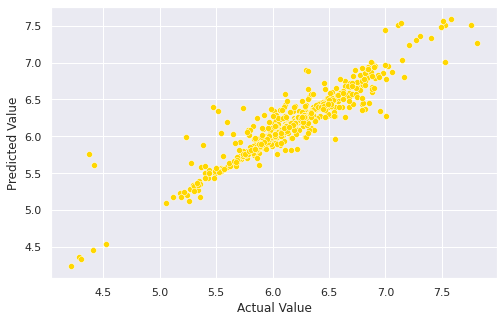

In [ ]:
plt.figure(figsize=(8,5))
sns.set_theme(style='darkgrid')
sns.scatterplot((y_test),(y_pred_XG),color='gold')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
param_grid_xgb ={'n_estimators': [50,100,150,200], 'max_depth': [3,5,7,10], 'min_child_weight': [2,3,4,5]}
random_search_xgb = RandomizedSearchCV(estimator=xgb,param_distributions=param_grid_xgb,cv=5,n_jobs=-1)
random_seaech_xgb = random_search_xgb.fit(x_train,y_train)
print('Our model score is',random_search_xgb.score(x_train,y_train))
best_parameters_2 = random_search_xgb.best_params_
print('best parameters are',best_parameters_2)
y_pred_xgb = random_search_xgb.predict(x_test)

[12:46:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Our model score is 0.9044004333380016
best parameters are {'n_estimators': 100, 'min_child_weight': 4, 'max_depth': 3}


In [ ]:
MSE=round(mean_squared_error(10**(y_test), 10**(y_pred_xgb)), 4)
RMSE=round(math.sqrt(mean_squared_error(10**(y_test), 10**(y_pred_xgb))),4)
MAE=round(mean_absolute_error(10**(y_test), 10**(y_pred_xgb)),4)
MAPE=round(mean_absolute_percentage_error(10**(y_test), 10**(y_pred_xgb)),4)
R2=round(r2_score(10**(y_test), 10**(y_pred_xgb)), 4)
model4= pd.DataFrame([['XGBoost Tuned', MSE,RMSE,MAE, MAPE,R2]],
               columns = ['Model', 'MSE', 'RMSE', 'MAE', 'MAPE','R2'])
model=model.append(model4, ignore_index = True)
model

,Model,MSE,RMSE,MAE,MAPE,R2
0,Random Forest Regressor,5.520198e+12,2.349510e+06,562533.9852,0.2676,0.7286
1,Random Forest Tuned,5.520198e+12,2.349510e+06,562533.9852,0.2676,0.8528
2,XGBoost,6.402750e+12,2.530366e+06,575932.0671,0.2411,0.6852
3,XGBoost Tuned,4.957998e+12,2.226656e+06,564190.7056,0.2453,0.7562


Text(0, 0.5, 'Predicted Value')

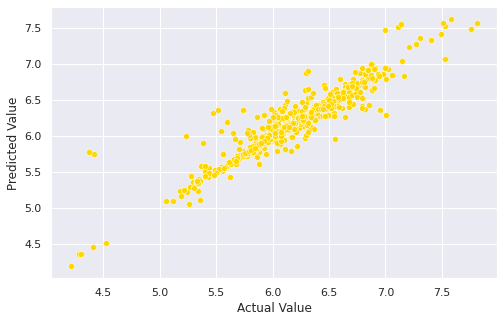

In [ ]:
plt.figure(figsize=(8,5))
sns.set_theme(style='darkgrid')
sns.scatterplot((y_test),(y_pred_xgb),color='gold')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')

##### Which hyperparameter optimization technique have you used and why?

I have used RandomizedSearchCV to reduce computational cost.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Our model has improved alot. MSE has decreased significantally.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

I have considered MSE. MSE(Mean Squarred Error) simply defines the overall perfomance of the model.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I have choosen XGBoost Tunded model as It obtained the lowest MAE.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Lets use Shap!

In [ ]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 575 kB 5.3 MB/s 


In [ ]:
import shap 

In [ ]:
model = random_search_xgb.best_estimator_

In [ ]:
explainer = shap.TreeExplainer(model)

In [ ]:
x_sampled = x_train.sample(100, random_state=10)

In [ ]:

shap.initjs()
shap_values = explainer.shap_values(x_test.iloc[0])
shap.force_plot(explainer.expected_value, shap_values, x_test.iloc[0]) 

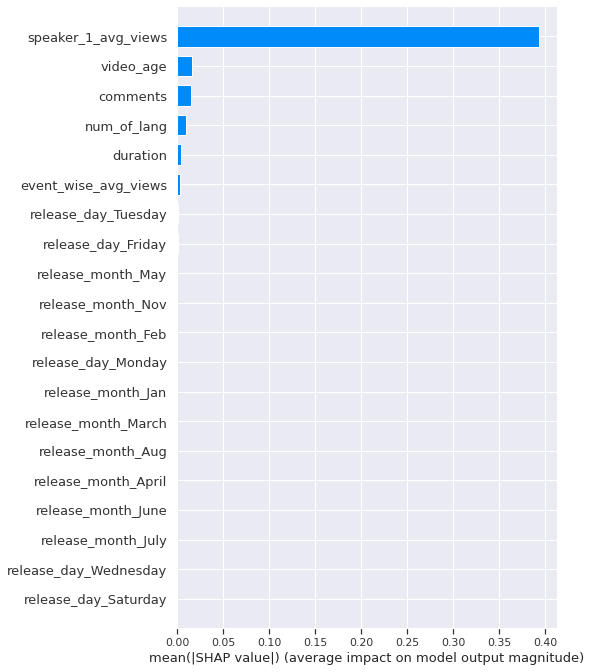

In [ ]:
shap.summary_plot(shap_values, x_train, plot_type="bar")

Here we can see, The most important feature is Speaker_1_avg views.

# **Conclusion**

*  Our best model has obtained lowes MAE which is 4.95e12.
*  XGBoost Hypertuned model is our best model.
*  Most important feature is found to speaker_1_avg_view, that means, Views on a TedTalk majorly depends on the speaker.
*  More Popular Speaker gets more views.

### ***Hurrah! We have successfully completed our Machine Learning Capstone Project !!!***